Smart Resume Screener - MentorBabaa Internship Assignment

This project implements a Resume Screening System using Machine Learning.
It compares job descriptions (JD) and resumes to predict whether they are a Match (1) or No Match (0).

We use TF-IDF vectorization for feature extraction and a Logistic Regression model for classification.

Step 1: Import Required Libraries

In this step, we import all the necessary Python libraries for:

Data handling → pandas, numpy

Text preprocessing → regex (re)

Feature extraction → TF-IDF (scikit-learn)

Modeling → Logistic Regression

Evaluation → Accuracy, Precision, Recall, F1-Score, Classification Report, Confusion Matrix

Visualization → matplotlib, seaborn

In [15]:
# Step 1: Install required packages
!pip install scikit-learn matplotlib seaborn sentence-transformers -q

In [5]:
# Step 1: Import Libraries

import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

Step 2: Dataset Preparation

We prepare a synthetic dataset with:

job_description: The requirements given by employers

resume: Candidate profiles/resumes

match: Label (1 = Match, 0 = No Match)

Note: The dataset contains both matching and non-matching pairs for training balance.

In [6]:
# -----------------------------
# Step 2: Dataset Preparation
# -----------------------------
data = {
    'job_description': [
        # Matches
        "Looking for a Python developer with experience in ML and AWS cloud computing",
        "Seeking Java developer with Spring Boot and microservices experience",
        "Data Scientist position requiring Python, SQL, and machine learning skills",
        "Frontend developer needed with React, JavaScript, and CSS expertise",
        "DevOps engineer with Docker, Kubernetes, and CI/CD pipeline experience",
        "Backend developer with Node.js, MongoDB, and API development skills",
        "Mobile app developer with Flutter and Android development experience",
        "Full stack developer with Python Django and React experience",
        "Machine learning engineer with TensorFlow and deep learning expertise",
        "Software engineer with C++ and system programming background",
        "Cloud architect with AWS, Azure, and infrastructure design skills",
        "QA engineer with automation testing and Selenium experience",
        "UI/UX designer with Figma, Adobe Creative Suite, and user research experience",

        # Non-Matches
        "Web developer with PHP, MySQL, and WordPress experience",
        "Product manager with agile methodology and project management skills",
        "Marketing specialist with SEO and social media expertise",
        "Sales executive with strong negotiation and client acquisition experience",
        "Teacher with classroom management and curriculum development experience",
        "Graphic designer with Photoshop, Illustrator, and creative design portfolio",
        "Chef with expertise in Italian, French, and Indian cuisines",
        "Accountant with financial reporting and Excel skills",
        "Lawyer with corporate law and contract drafting experience",
        "Nurse with patient care and hospital management background",
        "Content writer with blogging, copywriting, and editing skills",
        "HR specialist with recruitment and employee engagement experience"
    ],
    'resume': [
        # Matches
        "Experienced Python engineer skilled in ML, cloud computing, and AWS services",
        "Java developer with 3 years Spring Boot and microservices architecture experience",
        "Data scientist with expertise in Python, SQL, pandas, and scikit-learn",
        "Frontend specialist with React, JavaScript, HTML, CSS, and responsive design",
        "DevOps professional with Docker, Kubernetes, Jenkins, and AWS experience",
        "Backend engineer proficient in Node.js, Express, MongoDB, and REST APIs",
        "Mobile developer with Flutter, Dart, Android Studio, and iOS experience",
        "Full stack developer with Django, Python, React, and database management",
        "ML engineer with TensorFlow, PyTorch, deep learning, and neural networks",
        "Software developer with C++, system design, and performance optimization",
        "Cloud solutions architect with AWS, Azure, GCP, and infrastructure automation",
        "QA tester with Selenium, automated scripts, and API testing",
        "Designer skilled in UI/UX, Figma, wireframes, and usability testing",

        # Non-Matches
        "PHP developer with WordPress, MySQL, and WooCommerce experience",
        "Agile project manager with scrum certification and leadership skills",
        "SEO expert with keyword research, analytics, and social media campaigns",
        "Sales representative with lead generation and client relationship skills",
        "Teacher experienced in lesson planning, student engagement, and education",
        "Graphic designer with Adobe Illustrator, Photoshop, and branding expertise",
        "Chef with restaurant management and culinary arts diploma",
        "Chartered accountant with auditing, taxation, and finance background",
        "Corporate lawyer with litigation and contract drafting experience",
        "Registered nurse with patient care, first aid, and hospital operations experience",
        "Writer with blogging, copywriting, and editing experience",
        "HR executive with hiring, onboarding, and payroll management"
    ],
    'match': [
        # Matches (1s)
        1,1,1,1,1,1,1,1,1,1,1,1,1,
        # Non-Matches (0s)
        0,0,0,0,0,0,0,0,0,0,0,0
    ]
}

df = pd.DataFrame(data)
print("Dataset shape:", df.shape)
print("Match distribution:", df['match'].value_counts().to_dict())

Dataset shape: (25, 3)
Match distribution: {1: 13, 0: 12}


Step 3: Text Preprocessing

To ensure consistent text representation:

Convert all text to lowercase

Remove special characters/punctuation

Normalize extra spaces

Concatenate job_description and resume into one field → combined_text

Note : This helps the model compare both JD & resume simultaneously.

In [7]:
# -----------------------------
# Step 3: Text Preprocessing
# -----------------------------
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = ' '.join(text.split())
    return text

df['jd_clean'] = df['job_description'].apply(preprocess_text)
df['resume_clean'] = df['resume'].apply(preprocess_text)
df['combined_text'] = df['jd_clean'] + ' ' + df['resume_clean']

Step 4: Feature Extraction with TF-IDF

We use TF-IDF (Term Frequency–Inverse Document Frequency) to convert text into numerical vectors.

max_features=300 → Keep top 300 words/phrases

stop_words='english' → Remove common filler words (like “the”, “is”)

ngram_range=(1,2) → Include both single words (unigrams) and two-word combinations (bigrams)

This creates a sparse feature matrix for ML input.

In [8]:
# -----------------------------
# Step 4: Feature Extraction
# -----------------------------
vectorizer = TfidfVectorizer(max_features=300, stop_words='english', ngram_range=(1,2))
X = vectorizer.fit_transform(df['combined_text'])
y = df['match']

Step 5: Model Training

We use Logistic Regression (a simple yet effective classifier for text classification)

train_test_split (70-30) → Train:Test data split

class_weight="balanced" → Handles dataset imbalance

max_iter=1000 → Ensures convergence

The model learns to classify whether a JD–Resume pair is a good match.

In [9]:
# -----------------------------
# Step 5: Model Training
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
model = LogisticRegression(class_weight="balanced", random_state=42, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

Step 6: Model Evaluation

We evaluate using multiple metrics:

Accuracy → Overall correctness

Precision → Out of predicted Matches, how many were correct?

Recall → Out of actual Matches, how many were found?

F1-Score → Balance between precision and recall

We also display:

Classification Report → Per-class metrics

Confusion Matrix (heatmap) → Visual distribution of predictions


Model Evaluation Metrics:
Accuracy: 0.8750
Precision: 1.0000
Recall: 0.7500
F1-Score: 0.8571

Classification Report:
              precision    recall  f1-score   support

    No Match       0.80      1.00      0.89         4
       Match       1.00      0.75      0.86         4

    accuracy                           0.88         8
   macro avg       0.90      0.88      0.87         8
weighted avg       0.90      0.88      0.87         8



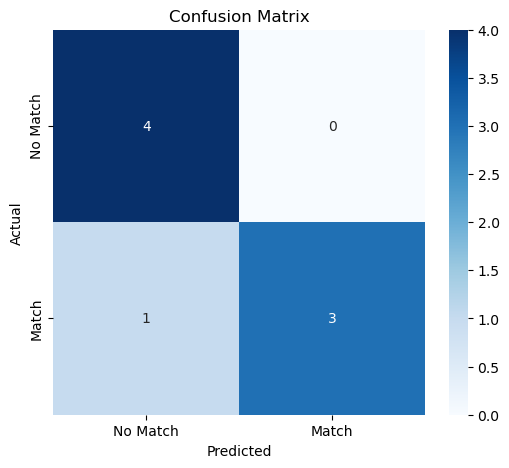

In [11]:
# -----------------------------
# Step 6: Evaluation
# -----------------------------
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print("\nModel Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Match','Match'], zero_division=0))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Match','Match'], yticklabels=['No Match','Match'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Step 7: Predictions on New Data

We test our model on unseen examples.

For each sample:

Clean and preprocess the JD and Resume

Transform using TF-IDF

Predict Match/No Match with probability

Compare with expected label

This shows real-world behavior of the system.

In [12]:
# -----------------------------
# Step 7: Predictions on New Data
# -----------------------------
new_samples = [
    {"jd":"Looking for React developer with JavaScript and frontend experience",
     "resume":"Frontend developer with 2 years React, JavaScript, HTML, CSS experience",
     "expected":"Match"},
    {"jd":"Seeking data scientist with Python and machine learning skills",
     "resume":"Chef with 5 years cooking experience in Italian and French cuisine",
     "expected":"No Match"},
    {"jd":"Backend developer needed with Node.js and database experience",
     "resume":"Backend engineer with Node.js, Express, MongoDB, and API development",
     "expected":"Match"}
]

print("\nPredictions on New Data:\n", "="*50)
for i,sample in enumerate(new_samples,1):
    jd_clean = preprocess_text(sample['jd'])
    resume_clean = preprocess_text(sample['resume'])
    combined = jd_clean + " " + resume_clean
    features = vectorizer.transform([combined])
    prediction = model.predict(features)[0]
    probability = model.predict_proba(features)[0,1]
    result = "Match" if prediction==1 else "No Match"
    print(f"\nSample {i}:")
    print(f"JD: {sample['jd']}")
    print(f"Resume: {sample['resume']}")
    print(f"Expected: {sample['expected']}")
    print(f"Predicted: {result}")
    print(f"Match Probability: {probability:.4f}")
    print(f"Correct: {'✓' if result==sample['expected'] else '✗'}")


Predictions on New Data:

Sample 1:
JD: Looking for React developer with JavaScript and frontend experience
Resume: Frontend developer with 2 years React, JavaScript, HTML, CSS experience
Expected: Match
Predicted: Match
Match Probability: 0.5873
Correct: ✓

Sample 2:
JD: Seeking data scientist with Python and machine learning skills
Resume: Chef with 5 years cooking experience in Italian and French cuisine
Expected: No Match
Predicted: Match
Match Probability: 0.5173
Correct: ✗

Sample 3:
JD: Backend developer needed with Node.js and database experience
Resume: Backend engineer with Node.js, Express, MongoDB, and API development
Expected: Match
Predicted: Match
Match Probability: 0.5294
Correct: ✓


Step 8: Feature Importance Analysis

Logistic Regression provides coefficients for each feature.

Positive coefficients → Words strongly linked with Match

Negative coefficients → Words strongly linked with No Match

We sort by importance and visualize the Top 15 features in a bar chart.

This gives interpretability — helps understand what keywords drive predictions.


Top 10 Most Important Features:
       feature  importance
110   engineer    0.313119
19         aws    0.264140
272   software    0.248881
31       cloud    0.225244
174         hr   -0.209323
75   developer    0.195541
297  wordpress   -0.190794
256        php   -0.190794
249      mysql   -0.190794
260         qa    0.180774


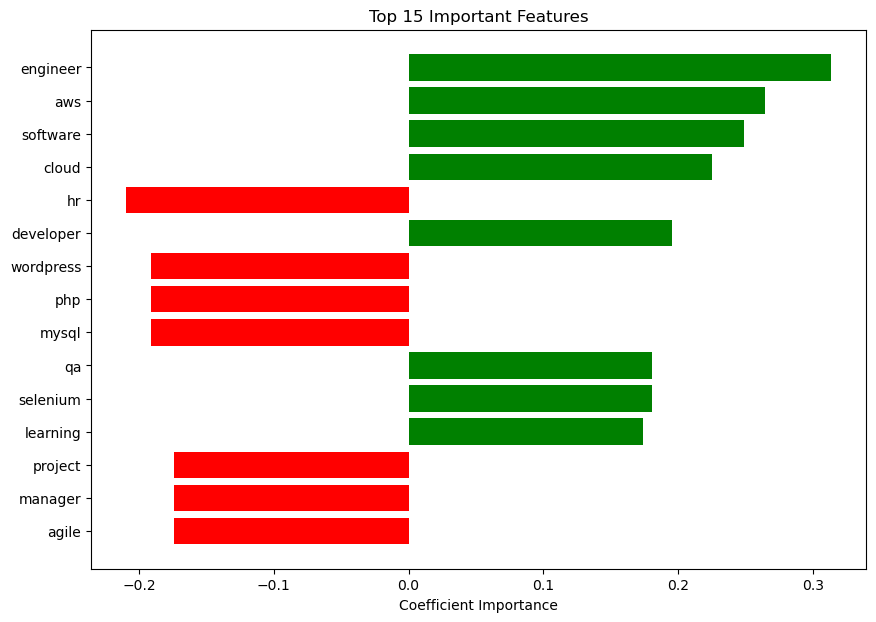

In [13]:
# -----------------------------
# Step 8: Feature Importance
# -----------------------------
feature_names = vectorizer.get_feature_names_out()
coefficients = model.coef_[0]
feature_importance = pd.DataFrame({"feature":feature_names, "importance":coefficients})
feature_importance = feature_importance.sort_values("importance", key=abs, ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

plt.figure(figsize=(10,7))
top_features = feature_importance.head(15)
colors = ['green' if x>0 else 'red' for x in top_features['importance']]
plt.barh(top_features['feature'], top_features['importance'], color=colors)
plt.xlabel("Coefficient Importance")
plt.title("Top 15 Important Features")
plt.gca().invert_yaxis()
plt.show()